**Name:** \_\_\_\_\_

**EID:** \_\_\_\_\_

# CS4487 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [3]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [4]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [5]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### 1. Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [6]:
### INSERT YOUR CODE HERE

In [7]:
### INSERT YOUR CODE HERE

# setup the document vectorizer
# - use english stop words
cntvect = feature_extraction.text.CountVectorizer(stop_words='english')

# create the vocabulary, and return the document vectors
trainX = cntvect.fit_transform(newsgroups_train.data)
trainY = newsgroups_train.target

# convert the test data
testX  = cntvect.transform(newsgroups_test.data)
testY  = newsgroups_test.target

print(trainX.shape)
print(testX.shape)

(2034, 26576)
(1353, 26576)


### 2. Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [8]:
### INSERT YOUR CODE HERE

In [9]:
### INSERT YOUR CODE HERE

# fit the NB Bernoulli model.
# the model automatically converts count vector into binary vector
bmodel = naive_bayes.BernoulliNB(alpha=0.1)
bmodel.fit(trainX, trainY)

# prediction
predY = bmodel.predict(testX)

# calculate accuracy
acc = metrics.accuracy_score(testY, predY)
print(acc)

0.696969696969697


What are the most informative words for each category?  Run the below code.

Note: `model.coef_[i]` will index the scores for the i-th class

In [10]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.coef_[i][t]))

class alt.atheism
    time      (-1.80349)
    know      (-1.60881)
    does      (-1.60881)
    god       (-1.58822)
    like      (-1.54825)
    say       (-1.52885)
    just      (-1.45481)
    think     (-1.39424)
    people    (-1.29824)
    don       (-1.18991)
class comp.graphics
    just      (-1.95020)
    don       (-1.91473)
    program   (-1.88048)
    need      (-1.85829)
    does      (-1.74429)
    use       (-1.73454)
    like      (-1.60722)
    know      (-1.50966)
    graphics  (-1.49428)
    thanks    (-1.47166)
class sci.space
    earth     (-1.90706)
    use       (-1.88461)
    time      (-1.76942)
    know      (-1.73062)
    think     (-1.73062)
    nasa      (-1.73062)
    don       (-1.69327)
    just      (-1.47214)
    like      (-1.41502)
    space     (-1.01909)
class talk.religion.misc
    say       (-1.65472)
    way       (-1.62736)
    like      (-1.61395)
    does      (-1.53709)
    know      (-1.48895)
    think     (-1.42082)
    god       (-1.377

### 3. Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [11]:
### INSERT YOUR CODE HERE

In [12]:
### INSERT YOUR CODE HERE

# TF-IDF representation
# (For TF, set use_idf=False)
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')

# setup the TF-IDF representation, and transform the training set
trainXtf = tf_trans.fit_transform(trainX)

# transform the test set
testXtf = tf_trans.transform(testX)

In [13]:
# fit a multinomial model (with smoothing)
mmodel_tf = naive_bayes.MultinomialNB(alpha=0.01)
mmodel_tf.fit(trainXtf, trainY)

# prediction
predYtf = mmodel_tf.predict(testXtf)
print(predYtf)
print(testY)

# calculate accuracy
acc = metrics.accuracy_score(testY, predYtf)
print(acc)

[2 1 1 ... 2 1 1]
[2 1 1 ... 3 1 1]
0.754619364375462


What are the most informative features for Multinomial model? Run the below code.

In [14]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.coef_[i][t]))

class alt.atheism
    religion  (-6.27527)
    objective (-6.22645)
    does      (-6.18746)
    say       (-6.09804)
    think     (-5.98203)
    people    (-5.96589)
    don       (-5.87817)
    deletion  (-5.73142)
    god       (-5.65913)
    just      (-5.63866)
class comp.graphics
    program   (-6.08537)
    hi        (-6.08070)
    does      (-6.02576)
    image     (-5.98895)
    looking   (-5.98739)
    know      (-5.91146)
    file      (-5.85131)
    files     (-5.85033)
    graphics  (-5.44781)
    thanks    (-5.42243)
class sci.space
    real      (-6.55010)
    launch    (-6.47681)
    moon      (-6.45843)
    think     (-6.45771)
    orbit     (-6.40969)
    thanks    (-6.37048)
    just      (-6.26170)
    like      (-6.16102)
    nasa      (-6.14133)
    space     (-5.35748)
class talk.religion.misc
    think     (-6.41554)
    just      (-6.41541)
    wrong     (-6.41521)
    don       (-6.39721)
    objective (-6.38006)
    people    (-6.30357)
    christian (-6.244

How do the most informative words differ between the TF-IDF multinomial model and the Bernoulli model?

- **INSERT YOUR ANSWER HERE**

- **INSERT YOUR ANSWER HERE**
- the TF-IDF words are more unique, e.g., for religion.misc, {christians, jesus, god} for TF-IDF religion, compared {people, just, don} for Bernoulli

Finally, look at a few of the misclassified documents. 

In [15]:
### INSERT YOUR CODE HERE ###

In [16]:
### INSERT YOUR CODE HERE ###
inds = where(testY != predYtf)

for i in inds[0]:
    print("==========================================================")
    print("--- true=" + newsgroups_test.target_names[testY[i]] + "; " + \
          "pred=" + newsgroups_test.target_names[predYtf[i]] + " ---")
    print(newsgroups_test.data[i])


--- true=alt.atheism; pred=sci.space ---
 

--- true=talk.religion.misc; pred=sci.space ---
[ deleted ]
[ deleted ]

  Your information on this topic is very much out of date.  Quantum Electro-
dynamics (QED - which considers light to be particles) has been experimentally
verified to about 14 decimal digits of precision under ALL tested conditions.
I'm afraid that this case, at least in the physics community, has been decided.
Laymen should consult "QED - The Strange Theory of Light and Matter" by Richard
P. Feynman and for the more technically minded there's "The Feynman Lectures on
Physics" by Feynman, Leighton and Sands (an excellent 3 volumes).  Case closed.

--- true=alt.atheism; pred=sci.space ---

Then Einstein should have had lunch with me at the Tien Fu
on Castro Street yesterday, when they handed me a fortune
cookie that said "He who has imagination but not knowledge
has wings, but no feet".
--- true=talk.religion.misc; pred=alt.atheism ---
This discussion on "objective" seem

--- true=talk.religion.misc; pred=alt.atheism ---
   So Rick, why not read the Bible for yourself?  It is written in plain
   english.  Decide for yourself.   
--- true=comp.graphics; pred=sci.space ---

 I have a copy of 'The Earth-From Space' on my wall that I purchased
from Space Shots, Inc. (LA, CA  (800) 272-2779).  As printed on the
poster, the image was created by Tom Van Sant and the GeoSphere Project.
The image IS copyrighted, so I doubt that you'll find it legally in
the public domain.  Part of the proceeds from the sale of the image go to the 
GeoSphere Project (an environmental education thing), and the cost is
nominal, so crack a 20 and buy one!  Also, I don't think it's always
safe to assume that just because the government 'funded' a project, any
products will be provided for free.  Many government agencies (NASA, NOAA)
and some private groups (National Geographic) provided assistance to the
GeoSphere Project.  This collaboration seems to be mostly oriented to
educating 

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**

- **INSERT YOUR ANSWER HERE**
- blank documents go to the class with largest prior (or first class)
- some key words will influence classifier, e.g., Einstein, physics, etc.


### 4. Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [17]:
### INSERT YOUR CODE HERE

best alpha= 0.000339322177189533 
best acc= 0.7812269031781227


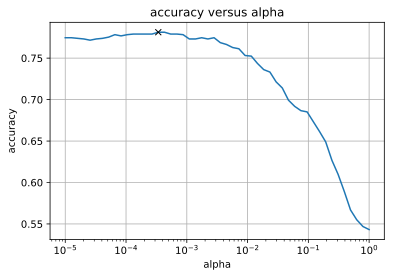

In [18]:
### INSERT YOUR CODE HERE

alphas = logspace(-5,0,50)
accs   = []

# TF-IDF feature extraction
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
trainXtf = tf_trans.fit_transform(trainX)
testXtf = tf_trans.transform(testX)

for myalpha in alphas:
    # fit a multinomial model (with smoothing)
    mmodel_tf = naive_bayes.MultinomialNB(alpha=myalpha)
    mmodel_tf.fit(trainXtf, trainY)

    # prediction
    predYtf = mmodel_tf.predict(testXtf)
    # calculate accuracy
    acc = metrics.accuracy_score(testY, predYtf)

    accs.append(acc)

# get best accuracy
bestalphai = argmax(accs)
bestalpha = alphas[bestalphai]
bestacc   = accs[bestalphai]
print("best alpha=", bestalpha, "\nbest acc=", bestacc)

# make a plot
plt.figure()
plt.semilogx(alphas, accs)
plt.semilogx(bestalpha, bestacc, 'kx')
plt.xlabel('alpha'); plt.ylabel('accuracy')     
plt.grid(True)  
plt.title('accuracy versus alpha');

### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [19]:
### INSERT YOUR CODE HERE

best maxf= 23789.947368421053 
best acc= 0.7812269031781227


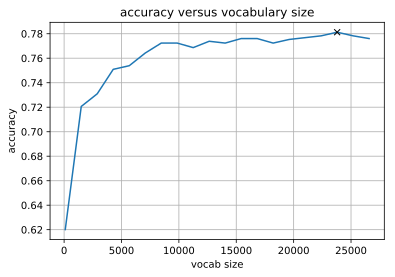

In [20]:
### INSERT YOUR CODE HERE

alpha       = 0.001
maxfeatures = linspace(100,26577,20)
accs   = []

for mf in maxfeatures:
    # create vocabulary, and extract counts
    cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=int(mf))
    trainX = cntvect.fit_transform(newsgroups_train.data)
    trainY = newsgroups_train.target
    testX  = cntvect.transform(newsgroups_test.data)
    testY  = newsgroups_test.target
    
    # TF-IDF feature extraction
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    trainXtf = tf_trans.fit_transform(trainX)
    testXtf = tf_trans.transform(testX)

    # fit a multinomial model (with smoothing)
    mmodel_tf = naive_bayes.MultinomialNB(alpha=alpha)
    mmodel_tf.fit(trainXtf, trainY)

    # prediction
    predYtf = mmodel_tf.predict(testXtf)
    # calculate accuracy
    acc = mean(predYtf==testY)
    
    accs.append(acc)

# get best accuracy
bestmfi = argmax(accs)
bestmf  = maxfeatures[bestmfi]
bestacc = accs[bestmfi]
print("best maxf=", bestmf, "\nbest acc=", bestacc)

# make a plot
plt.figure
plt.plot(maxfeatures, accs)
plt.plot(bestmf, bestacc, 'kx')
plt.xlabel('vocab size'); plt.ylabel('accuracy')     
plt.grid(True)  
plt.title('accuracy versus vocabulary size');